In [ ]:
import pandas as pd
from statsbombpy import sb
from mplsoccer import VerticalPitch, arrowhead_marker
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrow
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
from adjustText import adjust_text
from plottable import Table, ColumnDefinition


In [16]:
sb.competitions()
matches_df = sb.matches(competition_id=9, season_id=281)

In [17]:
matches_df

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3895302,2024-04-14,17:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Werder Bremen,5,0,available,...,2024-05-10T17:03:59.613154,29,Regular Season,BayArena,Harm Osmers,Xabier Alonso Olano,Ole Werner,1.1.0,2,2
1,3895292,2024-04-06,15:30:00.000,Germany - 1. Bundesliga,2023/2024,Union Berlin,Bayer Leverkusen,0,1,available,...,2024-05-12T21:08:37.897296,28,Regular Season,Stadion An der Alten Försterei,Benjamin Brand,Nenad Bjelica,Xabier Alonso Olano,1.1.0,2,2
2,3895333,2024-05-05,18:30:00.000,Germany - 1. Bundesliga,2023/2024,Eintracht Frankfurt,Bayer Leverkusen,1,5,available,...,2024-05-14T16:32:13.483516,32,Regular Season,Deutsche Bank Park,Christian Dingert,Dino Toppmöller,Xabier Alonso Olano,1.1.0,2,2
3,3895340,2024-05-12,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bochum,Bayer Leverkusen,0,5,available,...,2024-05-14T16:46:08.459843,33,Regular Season,Vonovia Ruhrstadion,Benjamin Brand,Heiko Butscher,Xabier Alonso Olano,1.1.0,2,2
4,3895348,2024-05-18,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Augsburg,2,1,available,...,2024-05-20T10:33:09.140760,34,Regular Season,BayArena,Matthias Jöllenbeck,Xabier Alonso Olano,Jess Christian Thorup,1.1.0,2,2
5,3895286,2024-03-30,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Hoffenheim,2,1,available,...,2024-05-08T03:36:21.320065,27,Regular Season,BayArena,Deniz Aytekin,Xabier Alonso Olano,Pellegrino Matarazzo,1.1.0,2,2
6,3895220,2024-02-03,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Darmstadt 98,Bayer Leverkusen,0,2,available,...,2024-05-08T01:01:15.978489,20,Regular Season,Merck-Stadion am Böllenfalltor,Tobias Reichel,Torsten Lieberknecht,Xabier Alonso Olano,1.1.0,2,2
7,3895250,2024-02-23,21:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,FSV Mainz 05,2,1,available,...,2024-05-08T00:38:33.864825,23,Regular Season,BayArena,Timo Gerach,Xabier Alonso Olano,Bo Henriksen,1.1.0,2,2
8,3895266,2024-03-10,20:30:00.000,Germany - 1. Bundesliga,2023/2024,Bayer Leverkusen,Wolfsburg,2,0,available,...,2024-04-28T10:29:53.455142,25,Regular Season,BayArena,Daniel Siebert,Xabier Alonso Olano,Niko Kovač,1.1.0,2,2
9,3895275,2024-03-17,16:30:00.000,Germany - 1. Bundesliga,2023/2024,Freiburg,Bayer Leverkusen,2,3,available,...,2024-04-19T22:39:18.935666,26,Regular Season,Europa-Park Stadion,Harm Osmers,Christian Streich,Xabier Alonso Olano,1.1.0,2,2


In [18]:
# Bayer Leverkusen vs Bayern Munich 3:0 2024-02-10
match_ID = 3895232
filtered_match = matches_df[matches_df['match_id'] == match_ID]

home_team = filtered_match['home_team'].iloc[0]
away_team = filtered_match['away_team'].iloc[0]
home_score = filtered_match['home_score'].iloc[0]
away_score = filtered_match['away_score'].iloc[0]
competition = filtered_match['competition'].str.rsplit(n=1).str[1].iloc[0]
date = pd.to_datetime(filtered_match['match_date']).dt.strftime('%B %d, %Y').iloc[0]

events_df = sb.events(match_id = match_ID)

background_color = '#f7f8f3'
text_color = '#464033'
sec_color = '#868B8E'
location_color = '#915ba9'
pass_color = '#1A5653'
carry_color = '#8C8C8C'
goal_color = '#BA0F30'
assist_color = '#F9BF50'
defact_color = '#90ADC6'

flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                  ['#f7f8f3', '#c03a1d'], N=10)

font_path = "C:/Users/jerry/Documents/Personal/09 Repositories/fonts/Roboto/Roboto-Black.ttf"
font_props = font_manager.FontProperties(fname=font_path)


In [19]:
def passnetwork(df, player_name, ax, fig):

    # Step 1: Preprocess Data
    # Extract last names for 'player' and 'pass_recipient' columns
    pass_df = df.copy()
    pass_df['player_lastname'] = df['player'].str.split().str[-1]
    pass_df['pass_recipient_lastname'] = df['pass_recipient'].str.split().str[-1]

    # Filter for successful non-throw-in passes made by a specific player
    passnetwork_df = pass_df[(pass_df.type == 'Pass') & 
                            (pass_df.pass_type != 'Throw-in') & 
                            (pass_df.player == player_name) & 
                            (pd.isnull(pass_df.pass_outcome))].reset_index(drop=True)

    # Clean up columns with all NaN values and extract start/end locations
    passnetwork_df.dropna(axis=1, how='all', inplace=True)
    passnetwork_df[['sloc_x', 'sloc_y']] = pd.DataFrame(passnetwork_df['location'].tolist(), index=passnetwork_df.index)
    passnetwork_df[['eloc_x', 'eloc_y']] = pd.DataFrame(passnetwork_df['pass_end_location'].tolist(), index=passnetwork_df.index)

    # Step 2: Calculate Average Positions for Pass Recipients
    avg_positions = []
    for name in passnetwork_df['pass_recipient_lastname'].unique():
        recx = passnetwork_df.loc[passnetwork_df['pass_recipient_lastname'] == name, 'eloc_x'].to_numpy()
        recy = passnetwork_df.loc[passnetwork_df['pass_recipient_lastname'] == name, 'eloc_y'].to_numpy()
        
        # Append average position and pass count to avg_positions
        avg_positions.append({
            'player': name,
            'x': recx.mean(),
            'y': recy.mean(),
            'num_of_passes': len(recx)
        })

    # Convert avg_positions to DataFrame and filter players with more than 2 passes
    tmpos_df = pd.DataFrame(avg_positions)
    tmpos_df = tmpos_df[tmpos_df['num_of_passes'] > 2]

    # Step 3: Calculate Average Position of key player
    player_position = [
        {
            'player': name,
            'x': group['sloc_x'].mean(),
            'y': group['sloc_y'].mean(),
            'num_of_passes': len(group)
        }
        for name, group in passnetwork_df.groupby('player_lastname')
    ]

    # Step 4: Create Pair Keys and Calculate Pass Counts Between Pairs
    passnetwork_df['pair_key'] = passnetwork_df.apply(lambda x: '_'.join([x['player_lastname'], x['pass_recipient_lastname']]), axis=1)
    passes_btwn = passnetwork_df.groupby(['pair_key']).sloc_x.count().reset_index()
    passes_btwn.rename({'sloc_x': 'pass_count'}, axis='columns', inplace=True)
    passes_btwn = passes_btwn[passes_btwn['pass_count'] > 2]  # Filter for significant connections
    passes_btwn['width'] = (passes_btwn.pass_count / passes_btwn.pass_count.max() * 10)

    # Step 5: Setup Pitch Plot
    pitch = VerticalPitch(
        positional=True,
        shade_middle=False,
        pitch_color=background_color,
        line_color=sec_color,
        linewidth=1.5,
        positional_color='#444444',
        positional_linestyle='dotted',
        positional_alpha=0.1,
        positional_zorder=2,
        goal_type='box',
        line_zorder=2
    )
    
    # Set up the figure and axis
    pitch.draw(ax=ax)
    fig.set_facecolor(background_color)
    
    # Add 'Top pass receivers' 
    ax.text(0.5, 1.05, 'Top pass receivers', ha='center', va='center', fontsize=12, color= sec_color, alpha = 0.8,
    fontproperties=font_props, transform=ax.transAxes)
    
    # Add 'Attack' label and directional arrow
    ax.text(0.015, 0.5, 'Attack', ha='center', va='center', fontsize=6, color= sec_color, 
        fontproperties=font_props, rotation=90, transform=ax.transAxes)
    
    arrow = FancyArrow(0.0325, 0.45, 0, 0.1, width=0.002, color=sec_color, transform=ax.transAxes)
    ax.add_patch(arrow)

    
    texts = []  # List to hold annotation texts for adjust_text
    # Step 6: Plot Pass Recipients with Position and Annotations
    for _, row in tmpos_df.iterrows():
        # Plot player's position
        pitch.scatter(row.x, row.y, s=300, color='black', edgecolors='white', linewidth=1, alpha=1, ax=ax, zorder=3)
        
        # Annotate the player's name with outline
        annotation = pitch.annotate(
            row.player, xy=(row.x, row.y), c='black',
            ha='center', va='top', fontproperties=font_props, size=12, ax=ax, zorder=4
        )
        annotation.set_path_effects([
            path_effects.Stroke(linewidth=2, foreground=background_color),
            path_effects.Normal()
        ])
        texts.append(annotation)
    
    adjust_text(texts, ax=ax)
        

    # Step 7: Plot Key Player's Position
    for player in player_position:
        pitch.scatter(player['x'], player['y'], s=300, color=goal_color, edgecolors='white', linewidth=1, alpha=1, ax=ax, zorder=3)

    # Iterate through each player in player_position and plot their positions
    for player in player_position:
        # Scatter plot for each player's average position on the pitch
        pitch.scatter(player['x'], player['y'], s=300, color=goal_color, 
                    edgecolors='white', linewidth=1, alpha=1, ax=ax, zorder=3)
        
        # Iterate through each pass in passes_btwn to create connection lines between players
        for i, row in passes_btwn.iterrows():
            # Extract player names from the 'pair_key' column
            player1 = row['pair_key'].split('_')[1]
            player2 = row['pair_key'].split('_')[0]
            
            # Retrieve the x and y coordinates for player1 from tmpos_df
            player1_x = tmpos_df.loc[tmpos_df['player'] == player1]['x'].iloc[0]
            player1_y = tmpos_df.loc[tmpos_df['player'] == player1]['y'].iloc[0]
            
            # Retrieve the x and y coordinates for player2 from player_position
            player2_x = player_position[0]['x']
            player2_y = player_position[0]['y']
            
            # Draw a line between player1 and player2 with specified attributes
            pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=2, zorder=2, color='black', ax=ax)
            
    bin_statistic = pitch.bin_statistic_positional(passnetwork_df.eloc_x, passnetwork_df.eloc_y, statistic= 'count',
                                                   positional= 'full', normalize= True,)
    pitch.heatmap_positional(bin_statistic, ax=ax,
                         cmap=flamingo_cmap, edgecolors='face')   

In [20]:
def heatmap(df, player_name, ax, fig):
    
    # Filter the events for the specific player and non-null location values
    player_df = df[(df['player'] == player_name) & (df['location'].notnull())].copy()
    
    # Split the location column into 'loc_x' and 'loc_y' columns
    player_df[['loc_x', 'loc_y']] = pd.DataFrame(player_df['location'].tolist(), index=player_df.index)
    
    # Initialize the pitch with customization
    pitch = VerticalPitch(
        positional=True,
        shade_middle=False,
        pitch_color=background_color,
        line_color=sec_color,
        linewidth=1.5,
        positional_color='#444444',
        positional_linestyle='dotted',
        positional_alpha=0.1,
        positional_zorder=2,
        goal_type='box',
        line_zorder=2
    )
    
    # Set up the figure and axis
    pitch.draw(ax=ax)
    fig.set_facecolor(background_color)
    
    #Add Open-play heatmap
    ax.text(0.5, 1.05, 'Open-play heatmap', ha='center', va='center', fontsize=12, color= sec_color, alpha = 0.8,
    fontproperties=font_props, transform=ax.transAxes)
    
    # Add 'Attack' label and directional arrow
    ax.text(0.015, 0.5, 'Attack', ha='center', va='center', fontsize=6, color= sec_color, 
        fontproperties=font_props, rotation=90, transform=ax.transAxes)
    
    
    arrow = FancyArrow(0.0325, 0.45, 0, 0.1, width=0.002, color=sec_color, transform=ax.transAxes)
    ax.add_patch(arrow)
    
    # Create a bin statistic and plot the heatmap
    bs = pitch.bin_statistic(player_df['loc_x'], player_df['loc_y'], bins=(31, 20))
    heatmap = pitch.heatmap(bs, ax=ax, edgecolors='face', cmap=flamingo_cmap)
    


In [21]:
def process_event_data(events_df):
    # Initialize a dictionary to hold the processed DataFrames
    event_data = {}

    # Filtering events for defensive actions (blocks, clearances, interceptions, and won duels)
    defact_df = events_df[(events_df['type'] == 'Block') |  
                          (events_df['type'] == 'Clearance') | 
                          (events_df['type'] == 'Interception') | 
                          ((events_df['type'] == 'Duel') & (events_df['duel_outcome'] == 'Won'))].copy()

    # Removing columns with all missing values and splitting location data
    defact_df.dropna(axis=1, how='all', inplace=True)
    defact_df[['loc_x', 'loc_y']] = pd.DataFrame(defact_df['location'].tolist(), index=defact_df.index)
    event_data['defensive_actions'] = defact_df

    # Filtering events for shots
    shots_df = events_df[events_df['type'] == 'Shot'].copy()
    shots_df.dropna(axis=1, how='all', inplace=True)
    shots_df[['loc_x', 'loc_y']] = pd.DataFrame(shots_df['location'].tolist(), index=shots_df.index)
    event_data['shots'] = shots_df

    # Filtering events for carries
    carry_df = events_df[events_df['type'] == 'Carry'].copy()
    carry_df.dropna(axis=1, how='all', inplace=True)
    carry_df[['sloc_x', 'sloc_y']] = pd.DataFrame(carry_df['location'].tolist(), index=carry_df.index)
    carry_df[['eloc_x', 'eloc_y']] = pd.DataFrame(carry_df['carry_end_location'].tolist(), index=carry_df.index)
    carry_df['angle'] = np.degrees(np.arctan2(carry_df['eloc_y'] - carry_df['sloc_y'], carry_df['eloc_x'] - carry_df['sloc_x']))
    event_data['carries'] = carry_df

    # Filtering events for dribbles (take-ons)
    takeon_df = events_df[events_df['type'] == 'Dribble'].copy()
    takeon_df.dropna(axis=1, how='all', inplace=True)
    takeon_df[['loc_x', 'loc_y']] = pd.DataFrame(takeon_df['location'].tolist(), index=takeon_df.index)
    event_data['dribbles'] = takeon_df

    # Filtering events for passes, excluding throw-ins
    pass_df = events_df[(events_df['type'] == 'Pass') & (events_df['pass_type'] != 'Throw-in')].copy()
    pass_df.dropna(axis=1, how='all', inplace=True)
    pass_df[['sloc_x', 'sloc_y']] = pd.DataFrame(pass_df['location'].tolist(), index=pass_df.index)
    pass_df[['eloc_x', 'eloc_y']] = pd.DataFrame(pass_df['pass_end_location'].tolist(), index=pass_df.index)
    event_data['passes'] = pass_df

    return event_data


In [22]:
def player_pitch(events_df, player_name, ax, fig):
    
    """
    Process event data and generate a pass and carry map for a given player.

    Parameters:
    events_df (DataFrame): DataFrame containing all event data.
    player_name (str): Name of the player to visualize.
    ax (matplotlib.axes.Axes): The matplotlib axis to plot on.
    """
    
    #Filter and Process Events Data for Each Type
    
    # Defensive actions
    defact_df = events_df[(events_df['type'] == 'Block') |  
                          (events_df['type'] == 'Clearance') | 
                          (events_df['type'] == 'Interception') | 
                          ((events_df['type'] == 'Duel') & (events_df['duel_outcome'] == 'Won'))].copy()
    defact_df.dropna(axis=1, how='all', inplace=True)
    defact_df[['loc_x', 'loc_y']] = pd.DataFrame(defact_df['location'].tolist(), index=defact_df.index)
    
    # Shots
    shots_df = events_df[events_df['type'] == 'Shot'].copy()
    shots_df.dropna(axis=1, how='all', inplace=True)
    shots_df[['loc_x', 'loc_y']] = pd.DataFrame(shots_df['location'].tolist(), index=shots_df.index)
    
    # Carries
    carry_df = events_df[events_df['type'] == 'Carry'].copy()
    carry_df.dropna(axis=1, how='all', inplace=True)
    carry_df[['sloc_x', 'sloc_y']] = pd.DataFrame(carry_df['location'].tolist(), index=carry_df.index)
    carry_df[['eloc_x', 'eloc_y']] = pd.DataFrame(carry_df['carry_end_location'].tolist(), index=carry_df.index)
    carry_df['angle'] = np.degrees(np.arctan2(carry_df['eloc_y'] - carry_df['sloc_y'], carry_df['eloc_x'] - carry_df['sloc_x']))
    
    # Dribbles (take-ons)
    takeon_df = events_df[events_df['type'] == 'Dribble'].copy()
    takeon_df.dropna(axis=1, how='all', inplace=True)
    takeon_df[['loc_x', 'loc_y']] = pd.DataFrame(takeon_df['location'].tolist(), index=takeon_df.index)
    
    # Passes (excluding throw-ins)
    pass_df = events_df[(events_df['type'] == 'Pass') & (events_df['pass_type'] != 'Throw-in')].copy()
    pass_df.dropna(axis=1, how='all', inplace=True)
    pass_df[['sloc_x', 'sloc_y']] = pd.DataFrame(pass_df['location'].tolist(), index=pass_df.index)
    pass_df[['eloc_x', 'eloc_y']] = pd.DataFrame(pass_df['pass_end_location'].tolist(), index=pass_df.index)
        
    # 2. Filter data for the specified player
    player_passes = pass_df[pass_df['player'] == player_name]
    player_carries = carry_df[carry_df['player'] == player_name]
    player_takeons = takeon_df[takeon_df['player'] == player_name]
    player_shots = shots_df[shots_df['player'] == player_name]
    player_defacts = defact_df[defact_df['player'] == player_name]
    
    # 3. Check if data is available for the player
    if player_passes.empty and player_carries.empty and player_takeons.empty:
        print(f"No data found for player: {player_name}")
        return

    # 4. Identify player's team and opponent team
    player_team = player_passes.iloc[0]['team'] if not player_passes.empty else player_carries.iloc[0]['team']
    team1, team2 = pass_df['team'].unique()
    opponent_team = team1 if player_team == team2 else team2
    
    # 5. Calculate Pass Statistics
    successful_passes = player_passes[pd.isnull(player_passes['pass_outcome'])].copy()
    unsuccessful_passes = player_passes[pd.notnull(player_passes['pass_outcome'])]
    goal_assist_passes = successful_passes[successful_passes['pass_goal_assist'] == True]
    successful_passes['pass_distance'] = np.sqrt((successful_passes['eloc_x'] - successful_passes['sloc_x'])**2 + 
                                                 (successful_passes['eloc_y'] - successful_passes['sloc_y'])**2)
    avg_pass_length = successful_passes['pass_distance'].mean()
    pass_completion = (successful_passes.shape[0] / (successful_passes.shape[0] + unsuccessful_passes.shape[0])) * 100

    # 6. Initialize pitch for visualization
    pitch = VerticalPitch(positional=True, shade_middle=False, pitch_color=background_color,line_color= sec_color, linewidth= 1.5,
                          positional_color='#444444', positional_linestyle='dotted', positional_alpha=0.3,
                          goal_type='box')
    pitch.draw(ax=ax)
    fig.set_facecolor(background_color)
    
    ax.text(0.015, 0.5, 'Attack', ha='center', va='center', fontsize=9, color= sec_color, 
        fontproperties=font_props, rotation=90, transform=ax.transAxes)
    
    arrow = FancyArrow(0.0325, 0.45, 0, 0.1, width=0.002, color=sec_color, transform=ax.transAxes)
    ax.add_patch(arrow)
    
    ax.text(0.78, 0.015, f'Avg. pass length = {avg_pass_length:.1f} yards', 
                   ha='center', va='center', fontsize=12, color= sec_color, fontproperties=font_props, transform=ax.transAxes)
    
    ax.text(0.18, 0.015, f'Pass completion = {pass_completion:.0f}%', 
                   ha='center', va='center', fontsize=12, color= sec_color, fontproperties=font_props, transform=ax.transAxes)

    # 7. Plot events on the pitch
    plot_passes(pitch, successful_passes, ax, 'Completed Passes', pass_color, alpha=1.0)
    plot_passes(pitch, unsuccessful_passes, ax, 'Unsuccessful Passes', pass_color, alpha=0.2)
    plot_goal_assist_passes(pitch, goal_assist_passes, ax, 'Goal Assist Passes', assist_color, alpha=1.0)
    plot_carries(pitch, player_carries, ax, 'Successful Carry')
    plot_takeons(pitch, player_takeons, ax)
    plot_shots(pitch, player_shots, ax, 'Shots Taken')
    plot_defacts(pitch, player_defacts, ax, 'Defensive Actions')

# Helper function to plot passes
def plot_passes(pitch, passes, ax, label, color, alpha=1.0):
    pitch.arrows(passes.sloc_x, passes.sloc_y, passes.eloc_x, passes.eloc_y,
                 width=2, headwidth=6, headlength=6, headaxislength=6,
                 color=color, alpha=alpha, ax=ax, label=label)

# Helper function to plot goal-assist passes
def plot_goal_assist_passes(pitch, passes, ax, label, color, alpha=1.0):
    pitch.arrows(passes.sloc_x, passes.sloc_y, passes.eloc_x, passes.eloc_y,
                 width=2, headwidth=6, headlength=6, headaxislength=6,
                 color=color, alpha=alpha, ax=ax, label=label, linestyle="dashed")

# Helper function to plot carries
def plot_carries(pitch, carries, ax, label):
    pitch.lines(carries.sloc_x, carries.sloc_y, carries.eloc_x, carries.eloc_y,
                lw=1.5, color=carry_color, ax=ax, label=label, linestyle='dotted')
    for _, row in carries.iterrows():
        pitch.scatter(x=row['eloc_x'], y=row['eloc_y'], 
                      marker=arrowhead_marker, rotation_degrees=row['angle'],
                      color=carry_color, s=100, ax=ax)

# Helper function to plot take-ons
def plot_takeons(pitch, takeons, ax):
    successful_takeons = takeons[takeons['dribble_outcome'] == 'Complete']
    unsuccessful_takeons = takeons[takeons['dribble_outcome'] == 'Incomplete']
    pitch.scatter(successful_takeons.loc_x, successful_takeons.loc_y, s=150, color=background_color, 
                  edgecolors=pass_color, alpha=1.0, marker='*', ax=ax, label='Completed Take-on')
    pitch.scatter(unsuccessful_takeons.loc_x, unsuccessful_takeons.loc_y, s=150, color=background_color, 
                  edgecolors=pass_color, alpha=0.2, marker='*', ax=ax, label='Incomplete Take-on')

# Helper function to plot shots
def plot_shots(pitch, shots, ax, label):
    colors = np.where(shots['shot_outcome'] == 'Goal', goal_color, background_color)
    pitch.scatter(shots.loc_x, shots.loc_y, s=(shots.shot_statsbomb_xg * 300) + 100, 
                  color=colors, edgecolors=pass_color, alpha=0.8, ax=ax, label=label)

# Helper function to plot defensive actions
def plot_defacts(pitch, defacts, ax, label):
    pitch.scatter(defacts.loc_x, defacts.loc_y, s=200, color=defact_color, 
                  edgecolors='black', alpha=0.8, marker='p', ax=ax, label=label)


In [26]:
def calculate_player_stats(df, player_name, ax, fig):
    """
    Calculate player statistics and visualize them in a summary table.

    Parameters:
    df (DataFrame): DataFrame containing event data for players.
    player_name (str): The name of the player to filter for.
    background_color (str): Background color for the plot.
    text_color (str): Text color for the table.
    """
    # Initialize an empty DataFrame to store stats
    stats_df = pd.DataFrame()
    
    # Filter defensive actions
    defact_df = df[(df['type'] == 'Block') |  
                   (df['type'] == 'Clearance') | 
                   (df['type'] == 'Interception') | 
                   ((df['type'] == 'Duel') & (df['duel_outcome'] == 'Won'))].copy()
    
    # Filter carry actions and extract coordinates
    carry_df = df[df['type'] == 'Carry'].copy()
    carry_df[['sloc_x', 'sloc_y']] = pd.DataFrame(carry_df['location'].tolist(), index=carry_df.index)
    carry_df[['eloc_x', 'eloc_y']] = pd.DataFrame(carry_df['carry_end_location'].tolist(), index=carry_df.index)
    
    def is_progressive_carry(start_x, end_x, pitch_length=120):
        start_dist_to_goal = pitch_length - start_x
        end_dist_to_goal = pitch_length - end_x
        distance_gained = start_dist_to_goal - end_dist_to_goal

        if start_x < 60 and end_x < 60:
            return distance_gained >= 30
        elif start_x < 60 and end_x >= 60:
            return distance_gained >= 15
        elif start_x >= 60 and end_x >= 60:
            return distance_gained >= 10
        else:
            return False

    carry_df['is_progressive'] = carry_df.apply(lambda row: is_progressive_carry(row['sloc_x'], row['eloc_x']), axis=1)
    
    # Filter passes and extract coordinates
    pass_df = df[(df['type'] == 'Pass') & 
                 (df['pass_type'] != 'Throw-in') & 
                 (pd.isnull(df['pass_outcome']))].copy()
    pass_df[['sloc_x', 'sloc_y']] = pd.DataFrame(pass_df['location'].tolist(), index=pass_df.index)
    pass_df[['eloc_x', 'eloc_y']] = pd.DataFrame(pass_df['pass_end_location'].tolist(), index=pass_df.index)
    
    def is_progressive(start_x, end_x, pitch_length=120):
        start_distance_to_goal = pitch_length - start_x
        end_distance_to_goal = pitch_length - end_x
        distance_closer_to_goal = start_distance_to_goal - end_distance_to_goal
        
        if start_x < pitch_length / 2 and end_x < pitch_length / 2:
            threshold = 30
        elif start_x < pitch_length / 2 and end_x >= pitch_length / 2:
            threshold = 15
        elif start_x >= pitch_length / 2 and end_x >= pitch_length / 2:
            threshold = 10
        else:
            threshold = 0

        return distance_closer_to_goal >= threshold

    pass_df["is_progressive"] = pass_df.apply(lambda row: is_progressive(row['sloc_x'], row['eloc_x']), axis=1)
    
    # Calculate counts and progressive counts
    pass_counts = pass_df.groupby('player').size()
    progressive_pass_counts = pass_df.groupby('player')['is_progressive'].sum()
    carry_counts = carry_df.groupby('player').size()
    progressive_carry_counts = carry_df.groupby('player')['is_progressive'].sum()
    defact_counts = defact_df.groupby('player').size()

    # Assign results to stats_df with rankings
    stats_df['successful_passes'] = pass_counts
    stats_df['successful_passes_rank'] = stats_df['successful_passes'].rank(method='min', ascending=False).astype(int)
    stats_df['progressive_passes'] = progressive_pass_counts
    stats_df['progressive_passes_rank'] = stats_df['progressive_passes'].rank(method='min', ascending=False).astype(int)
    stats_df['carries'] = carry_counts
    stats_df['carries_rank'] = stats_df['carries'].rank(method='min', ascending=False).astype(int)
    stats_df['progressive_carries'] = progressive_carry_counts
    stats_df['progressive_carries_rank'] = stats_df['progressive_carries'].rank(method='min', ascending=False).astype(int)
    stats_df['defensive_actions'] = defact_counts
    stats_df['defensive_actions'].fillna(0, inplace=True)
    stats_df['defensive_actions_rank'] = stats_df['defensive_actions'].rank(method='min', ascending=False).astype(int)
    
    # Reset index to ensure 'player' column is included
    stats_df.reset_index(inplace=True)
    stats_df.set_index('player', inplace=True)

    # Check if the player exists in the index
    if player_name not in stats_df.index:
        print(f"No data found for player: {player_name}")
        return

    # Get the player stats using the index
    player_stats = stats_df.loc[player_name]
    
    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        'Value': [
            int(player_stats['successful_passes']),
            int(player_stats['progressive_passes']),
            int(player_stats['carries']),
            int(player_stats['progressive_carries']),
            int(player_stats['defensive_actions'])
        ],
        'Match Rank': [
            int(player_stats['successful_passes_rank']),
            int(player_stats['progressive_passes_rank']),
            int(player_stats['carries_rank']),
            int(player_stats['progressive_carries_rank']),
            int(player_stats['defensive_actions_rank'])
        ]
    }, index=['Total passes', 'Total progressive passes', 'Total carries', 
              'Total progressive carries', 'Total defensive actions'])
    
    # Define column properties for the table
    col_defs = [
        ColumnDefinition(name='index', title='', textprops={'ha': 'left', 'fontweight': 'bold', 'backgroundcolor': background_color}),
        ColumnDefinition(name='Value', width=0.5, textprops={'ha': 'center', 'color': text_color, 'alpha': 0.8, 'backgroundcolor': background_color}),
        ColumnDefinition(name='Match Rank', width=0.5, textprops={'ha': 'center', 'color': text_color, 'alpha': 0.8, 'backgroundcolor': background_color})
    ]
    
    fig.set_facecolor(background_color)
    # Plot the table
    tab = Table(summary_df, ax = ax, column_definitions=col_defs, 
                col_label_divider_kw={'alpha': 0.2, 'lw': 0.5}, 
                row_divider_kw={'alpha': 0.2, "lw": 0.5})


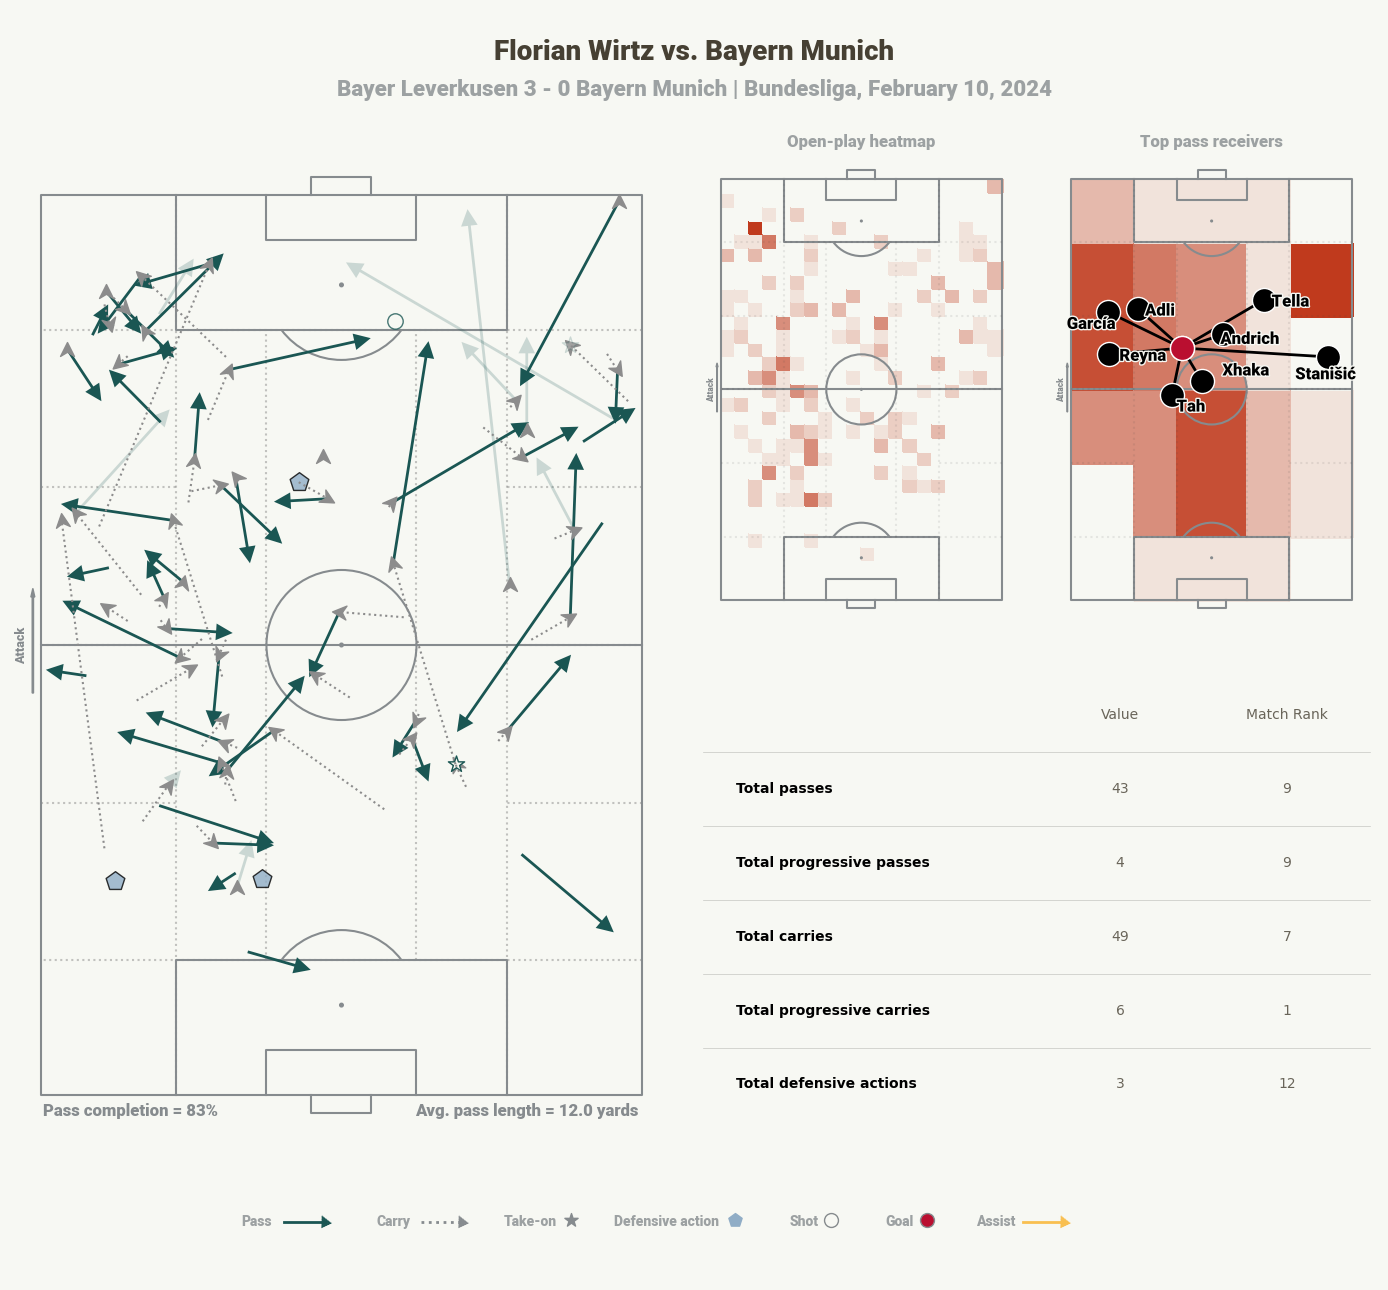

In [39]:

def player_dashboard(df, player_name):
    # Initialize the main figure
    fig = plt.figure(figsize=(14, 13), facecolor=background_color)
    
    # Create the top-level 4x3 GridSpec with adjusted width and height ratios
    outer_gs = GridSpec(4, 3, figure=fig, height_ratios=[1, 4, 4, 1], width_ratios=[6, 3, 3])
    
    # Identify player's team and opponent team
    player_team = df.loc[df['player'] == player_name, 'team'].unique()
    team1, team2 = df['team'].unique()
    opponent_team = team1 if player_team == team2 else team2

    # Title Section (Top Row, spanning all 3 columns)
    ax_title = fig.add_subplot(outer_gs[0, :], facecolor=background_color)
    # Player vs Opponent label
    ax_title.text(0.5, 0.75, s=f'{player_name} vs. {opponent_team}',
                  fontsize=20, color=text_color, fontproperties=font_props, 
                  ha="center", va="top")
    # Match information label (team scores, competition, and date)
    ax_title.text(0.5, 0.4, s=f'{home_team} {home_score} - {away_score} {away_team} | {competition}, {date}',
                  fontsize=16, color=sec_color, fontproperties=font_props, 
                  ha="center", va="top", alpha=0.8)
    # Remove axis ticks
    ax_title.set_xticks([])
    ax_title.set_yticks([])

    # Main Pitch Section (Second and Third Rows, first column)
    ax_playerpitch = fig.add_subplot(outer_gs[1:3, 0])
    # Plot player's pitch-related events
    player_pitch(df, player_name, ax=ax_playerpitch, fig = fig)

    # Nested GridSpec for right two columns, containing heatmap, pass receivers, and table
    right_gs = GridSpecFromSubplotSpec(2, 2, subplot_spec=outer_gs[1:3, 1:], height_ratios=[1, 1])

    # Right Top Left Plot: Heatmap
    ax_heatmap = fig.add_subplot(right_gs[0, 0])
    heatmap(df, player_name, ax=ax_heatmap, fig = fig)
    ax_heatmap.set_xticks([])
    ax_heatmap.set_yticks([])

    # Right Top Right Plot: Top Pass Receivers
    ax_pass_receivers = fig.add_subplot(right_gs[0, 1])
    passnetwork(df, player_name, ax=ax_pass_receivers, fig = fig)
    ax_pass_receivers.set_xticks([])
    ax_pass_receivers.set_yticks([])

    # Right Bottom Plot: Table spanning two columns
    ax_table = fig.add_subplot(right_gs[1, :], facecolor=background_color)
    calculate_player_stats(df, player_name, ax = ax_table, fig = fig)
    ax_table.set_xticks([])
    ax_table.set_yticks([])

    # Legend Section (Fourth Row, spanning all 3 columns)
    ax_legend = fig.add_subplot(outer_gs[3, :], facecolor=background_color)
    ax_legend.set_xlim(0, 1)
    ax_legend.set_ylim(0, 1)

    # Legend items: Plot symbols and labels for each type of player event
    # Pass
    ax_legend.plot([0.20, 0.23], [0.5, 0.5], color=pass_color, lw=2)
    ax_legend.text(0.18, 0.5, 'Pass', fontproperties=font_props, color=sec_color, ha='center', va='center', alpha=0.8)
    ax_legend.text(0.23, 0.53, '\u25B6', ha='center', va='center', fontsize=11, color=pass_color, rotation=115, transform=ax_legend.transAxes)

    # Carry
    ax_legend.plot([0.30, 0.33], [0.5, 0.5], color=sec_color, lw=2, ls='dotted')
    ax_legend.text(0.28, 0.5, 'Carry', fontproperties=font_props, color=sec_color, ha='center', va='center', alpha=0.8)
    ax_legend.text(0.33, 0.53, '\u25B6', ha='center', va='center', fontsize=11, color=sec_color, rotation=115, transform=ax_legend.transAxes)

    # Take-on
    ax_legend.scatter(x=0.41, y=0.52, marker='*', s=100, color=sec_color)
    ax_legend.text(0.38, 0.5, 'Take-on', fontproperties=font_props, color=sec_color, ha='center', va='center', alpha=0.8)

    # Defensive Action
    ax_legend.scatter(x=0.53, y=0.52, marker='p', s=100, color=defact_color)
    ax_legend.text(0.48, 0.5, 'Defensive action', fontproperties=font_props, color=sec_color, ha='center', va='center', alpha=0.8)

    # Shot
    ax_legend.scatter(x=0.6, y=0.52, s=100, color=background_color, edgecolors=sec_color)
    ax_legend.text(0.58, 0.5, 'Shot', fontproperties=font_props, color=sec_color, ha='center', va='center', alpha=0.8)

    # Goal
    ax_legend.scatter(x=0.67, y=0.52, s=100, color=goal_color, edgecolors=sec_color)
    ax_legend.text(0.65, 0.5, 'Goal', fontproperties=font_props, color=sec_color, ha='center', va='center', alpha=0.8)

    # Assist
    ax_legend.plot([0.74, 0.77], [0.5, 0.5], color=assist_color, lw=2)
    ax_legend.text(0.72, 0.5, 'Assist', fontproperties=font_props, color=sec_color, ha='center', va='center', alpha=0.8)
    ax_legend.text(0.77, 0.53, '\u25B6', ha='center', va='center', fontsize=11, color=assist_color, rotation=115, transform=ax_legend.transAxes)

    # Display the figure with the defined layout
    ax_title.set_axis_off()
    ax_legend.set_axis_off()
    plt.tight_layout()
    plt.show()
    

player_dashboard(events_df, player_name = 'Florian Wirtz')